 # <font color='red'> Coincidenze attese underwater channel</font>

Si consideri un esperimento nel quale vengono generate coppie di fotoni: uno dei due fotoni viene usato come 'heralder' per la rivelazione dell'altro. Chiamiamo **coincFree** il numero (chiesto in input all'utente) di coincidenze osservate nel caso in cui entrambi i fotoni si propaghino free-space in aria. Il programma prova a stimare il numero **coincUnderwater** di coincidenze attese nel caso in cui il fotone heralded si propaghi per un tratto di lunghezza **z** in acqua di mare, in funzione della lunghezza d'onda di quest'ultimo.

Il numero di coincidenze attese **coincUnderwater** viene stimato semplicemente moltplicando **coincFree** per la **trasmittanza**  $\mathcal{T(\lambda)}$ del canale quantistico underwater. Quest'ultima viene a sua volta calcolata a partire dal coefficiente di attenuazione $c(\lambda)$, al quale è legata dalla legge di Beer-Lambert:
<br>
<br>
$$\mathcal{T}(\lambda) = \frac{I_T (\lambda)}{I_0 (\lambda)} = e^{- \, c(\lambda) \, z} $$
<br>
<br>
Dove ovviamente $I_0$ e $I_T$  sono le intensità di un fascio, a lunghezza d'onda $\lambda$, prima e dopo essersi propagato attraverso un cammino di lunghezza **z** nell'acqua (chiesta in input all'utente).
Il calcolo viene eseguito per tre diversi andamenti del coefficiente di attenuazione $c(\lambda)$ in funzione della lunghezza d'onda.
<br>
Nel primo caso i dati riguardano un campione di acqua di mare "artificiale", preparata combinando acqua distillata con tre composti chimici ($NaCl$, $MgSO_4$, $MgCl_2$, $NaHCO_3$, $CaCl_2$, $KCl$, $KBr$). I dati sono importati a mano dall'articolo:
<br>
<br>
**S. A. Sullivan**, “ *Experimental study of the absorption in distilled water, artificial sea water, and heavy water in the
visible region of the spectrum* ”, J. Opt. Soc. Am. **53** 962-968 (1963)
<br>
<br>
per cui l'etichetta riguardante questi dati (che etichetta variabili, funzioni, grafico finale) sarà **Sull**. Sono disponibili dati fino a $790 \, nm$.
<br>
Nel secondo caso il coefficiente di attenuazione viene calcolato come
<br>
<br>
$$c_w(\lambda) \, = \, a_w (\lambda) \, + \, b_w (\lambda) $$
<br>
<br>
dove $a_w(\lambda)$ e $b_w (\lambda)$ sono (rispett.) i coefficienti di assorbimento e scattering dell'acqua di mare pura ("clearest natural water", sostanzialmente uguale alla precedente ma qui sono stimati a partire da una metanalisi di tutta la lettertura precedente, vabbè..).  I dati per $a_w (\lambda)$ e $b_w (\lambda)$ sono importati a mano dall'articolo:
<br>
<br>
**R. C. Smith and K. S. Baker**, "*Optical properties of the clearest natural waters (200–800 nm)*", Appl. Opt. **20**, 177-184 (1981)
<br>
<br>
per cui l'etichetta riguardante questi dati (disponibili fino a $800 \, nm$) sarà **SB**.
<br>
Infine nel terzo caso, per avvicinarci di più al comportamento di acque oceaniche reali, il coefficiente di attenuazione viene calcolato secondo la formula
<br>
<br>
$$ c(\lambda) \, = \, c_w (\lambda) \, + \, (0.39 \, \times \, C_c^{0.57}) \, \times \, [1.563 \, - \, 0.001149 \, \times \, \lambda] $$
<br>
<br>


dove i valori di $c_w (\lambda)$ sono quelli calcolati nel caso precedente (Smith & Baker) e $C_c$ è la concentrazione di clorofilla (che viene chiesta in input all'utente). Questo è un modello "bio-ottico" empirico proposto in
<br>
<br>
**K. J. Voss**,  "*A spectral model of the beam attenuation coefficient in the ocean and coastal areas*", Limnology and Oceanography, **37**
<br>
<br>




In [1]:
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import math


In [2]:
wavelengthsI = np.arange (580, 761)                                # genero e stampo le freq. (passi di 1nm)
print (wavelengthsI)

[580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597
 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615
 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633
 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651
 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669
 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687
 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705
 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723
 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741
 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759
 760]


In [3]:
wavelengthsII = np.arange (762, 792, 2)                            # genero e stampo le freq. da 762nm a 790nm (passi di 2nm)
print( wavelengthsII)

[762 764 766 768 770 772 774 776 778 780 782 784 786 788 790]


In [4]:
wavelengthsSull =  np.concatenate([wavelengthsI,wavelengthsII])                            # unisco e stampo le due liste
#print(wavelengthsSull)

In [5]:
wavelengthsSB = np.arange (500, 810, 10)                            # genero e stampo le freq. da 500nm a 800nm (passi di 10nm)
print( wavelengthsSB)

[500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670
 680 690 700 710 720 730 740 750 760 770 780 790 800]


In [6]:
coeffSullgrezzi = np.array([0.133, 0.131, 0.147, 0.141, 0.151, 0.146, 0.156, 0.157, \
                      0.163, 0.163, 0.167, 0.175, 0.181, 0.188, 0.198, 0.208, \
                      0.217, 0.232, 0.240, 0.246, \
     0.265, 0.281, 0.287, 0.290, 0.290, 0.289, 0.296, 0.297, \
     0.297, 0.297, 0.299, 0.301, 0.300, 0.302, 0.299, 0.301, 0.299, 0.308, \
     0.307, 0.310, 0.317, 0.311, 0.315, 0.315, 0.314, 0.317, 0.317, 0.317, \
     0.312, 0.317, 0.312, 0.318, 0.319, 0.320, 0.321, 0.320, 0.329, 0.323, \
     0.323, 0.325, 0.326, 0.326, 0.329, 0.328, 0.329, 0.336, 0.335, 0.341, \
     0.342, 0.352, 0.357, 0.357, 0.370, 0.373, 0.384, 0.389, 0.399, \
     0.407, 0.406, 0.403, 0.405, 0.406, 0.411, 0.414, 0.416, 0.419, 0.424, \
     0.421, 0.423, 0.422, 0.422, 0.431, 0.430, 0.431, 0.431, 0.432, 0.437, \
     0.440, 0.443, 0.449, 0.450, 0.460, 0.466, 0.468, 0.473, 0.474, 0.479, \
     0.479, 0.486, 0.494, 0.501, 0.512, 0.535, 0.542, 0.552, 0.570, 0.585, \
     0.604, 0.618, 0.633,                  
    0.647, 0.664, 0.688, 0.707, 0.733, 0.745, 0.770, 0.802, 0.839, 0.864, \
    0.908, 0.949, 0.981, 1.022, 1.052, 1.107, 1.173, 1.217, 1.27, 1.334,      # importo a mano coeff Sullivan
    1.372, 1.446, 1.502, 1.597, 1.664, 1.759, 1.865, 1.946, 2.104, 2.191, \
    2.308, 2.398, 2.453, 2.483, 2.555, 2.6, 2.647, 2.664, 2.693, 2.692, \
    2.729, 2.718, 2.742, 2.751, 2.757, 2.753, 2.763, 2.74, 2.733, 2.712, \
    2.698, 2.71, 2.705, 2.718, 2.705, 2.714, 2.724, 2.731, 2.733, 2.737, \
    2.727, 2.717, 2.701, 2.61, 2.567, 2.54, 2.507, 2.468, 2.438, 2.414, \
    2.376, 2.243, 2.164, 2.137, 2.106, 2.097])
#print(coeffSull)

In [7]:
absorpcoeff = np.array([0.0257, 0.0357, 0.0477, 0.0507, 0.0558, 0.0638, 0.0708, 0.0799, 0.108, 0.157, \
    0.244, 0.2890, 0.309, 0.319, 0.329, 0.349, 0.400, 0.430, 0.450, 0.500, \
    0.650, 0.839, 1.169, 1.799, 2.38, 2.47, 2.55, 2.51, 2.36, 2.16, 2.07])   #coefficienti assorbimento acqua pura (Smith & Baker)
#print(absorpcoeff)

In [8]:
scattcoeff = np.array([0.0029, 0.0026, 0.0024, 0.0022, 0.0021, 0.0019, 0.0018, 0.0017, 0.0016, 0.0015, \
    0.0014, 0.0013, 0.0012, 0.0011, 0.0010, 0.0010, 0.008, 0.008, 0.007, 0.007, \
    0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0005, 0.0005, 0.0005, 0.0004, 0.0004, 0.0004])   #coefficienti scattering clearest waters (Smith & Baker)
#print(scattcoeff)

In [10]:
coeffSBgrezzi = absorpcoeff + scattcoeff
print(coeffSBgrezzi)

[0.0286 0.0383 0.0501 0.0529 0.0579 0.0657 0.0726 0.0816 0.1096 0.1585
 0.2454 0.2903 0.3102 0.3201 0.33   0.35   0.408  0.438  0.457  0.507
 0.6507 0.8397 1.1696 1.7996 2.3806 2.4705 2.5505 2.5105 2.3604 2.1604
 2.0704]


In [11]:
def sigto_idler (l_onda):
    valore = 1/((1.0/405) - (1.0 / l_onda))                
    return valore


In [12]:
vet1 = []
vet2 = []
vet3 = []

for i in range(len(wavelengthsSull)):
  if sigto_idler(wavelengthsSull[i]) < 1050:
        vet1.append(sigto_idler(wavelengthsSull[i]))
        vet2.append(wavelengthsSull[i])  
        vet3.append(coeffSullgrezzi[i])
wavelengthsidlerSull= np.array(vet1)
wavelengthsSullnew = np.array(vet2)
coeffSull = np.array(vet3)

print(coeffSull)


vet1 = []
vet2 = []
vet3 = []

for i in range(len(wavelengthsSB)):
  if sigto_idler(wavelengthsSB[i]) < 1050:
        vet1.append(sigto_idler(wavelengthsSB[i]))
        vet2.append(wavelengthsSB[i]) 
        vet3.append(coeffSBgrezzi[i])
wavelengthsidlerSB = np.array(vet1)
wavelengthsSBnew = np.array(vet2)
coeffSB = np.array(vet3)

print(coeffSB)


#for i in range(len(wavelengthsidlerSull)):
#        print(i, wavelengthsSullnew[i], wavelengthsidlerSull[i], coeffSull[i]) 


[0.405 0.406 0.411 0.414 0.416 0.419 0.424 0.421 0.423 0.422 0.422 0.431
 0.43  0.431 0.431 0.432 0.437 0.44  0.443 0.449 0.45  0.46  0.466 0.468
 0.473 0.474 0.479 0.479 0.486 0.494 0.501 0.512 0.535 0.542 0.552 0.57
 0.585 0.604 0.618 0.633 0.647 0.664 0.688 0.707 0.733 0.745 0.77  0.802
 0.839 0.864 0.908 0.949 0.981 1.022 1.052 1.107 1.173 1.217 1.27  1.334
 1.372 1.446 1.502 1.597 1.664 1.759 1.865 1.946 2.104 2.191 2.308 2.398
 2.453 2.483 2.555 2.6   2.647 2.664 2.693 2.692 2.729 2.718 2.742 2.751
 2.757 2.753 2.763 2.74  2.733 2.712 2.698 2.71  2.705 2.718 2.705 2.714
 2.724 2.731 2.733 2.737 2.727 2.717 2.701 2.61  2.567 2.54  2.507 2.468
 2.438 2.414 2.376 2.243 2.164 2.137 2.106 2.097]
[0.408  0.438  0.457  0.507  0.6507 0.8397 1.1696 1.7996 2.3806 2.4705
 2.5505 2.5105 2.3604 2.1604 2.0704]


In [358]:
def eff_detector(l_onda):
    valori=np.array([
    [231.37569472297025, 0.5975048634018437],[238.02211654156878, 0.09160534551298305],[238.8529192688936, 0.6159012095068932],[238.8529192688936, 0.6097690941385434],[238.8529192688936, 0.605170007612281],[245.4993410874921, 0.6021039499281061],[245.4993410874921, 0.5959718345597562],[245.4993410874921, 0.11000169161803264],[245.4993410874921, 0.10386957624968274],[245.4993410874921, 0.09927048972342034],[252.14576290609062, 0.09620443203924545],[252.14576290609062, 0.09007231667089566],[253.80736836074027, 0.6205002960331556],[255.4689738153899, 0.5959718345597562],[257.1305792700395, 0.6266324114015054],[257.1305792700395, 0.6143681806648058],[261.2845929066636, 0.11613380698638243],[262.11539563398844, 0.6067030364543684],[263.77700108863803, 0.12073289351264482],[380.0893829141122, -0.05249936564323776],[381.7509883687618, -0.04483422143280047],[383.41259382341144, -0.03870210606445068],[385.0741992780611, -0.03256999069610089],[396.7054374606085, -0.05709845216950016],[402.7979907943238, 0.08240717246045837],[401.69025382455743, 0.07780808593419597],[405.84426746118146, 0.08547323014463326],[405.01346473385667, 0.08087414361837086],[405.01346473385667, -0.040235134906538184],[405.01346473385667, -0.04636725027488797],[405.01346473385667, -0.05096633680115037],[407.7828071582727, 0.09160534551298305],[411.106018067572, 0.09518241281118722],[409.99828109780555, 0.09007231667089566],[411.6598865524552, -0.05709845216950016],[414.42922897687123, 0.10080351856550784],[413.3214920071048, 0.09620443203924545],[417.75243988617046, 0.10693563393385763],[416.64470291640407, 0.10080351856550784],[421.07565079546976, 0.11306774930220753],[419.96791382570336, 0.10693563393385763],[419.96791382570336, -0.040235134906538184],[419.96791382570336, -0.04636725027488797],[419.96791382570336, -0.05096633680115037],[424.398861704769, 0.11919986467055732],[423.2911247350026, 0.11306774930220753],[427.7220726140682, 0.1253319800389071],[426.61433564430183, 0.11919986467055732],[431.0452835233675, 0.1345301530914319],[429.9375465536011, 0.12839803772308211],[429.9375465536011, 0.12379895119681972],[434.0915601902252, 0.1437283261439566],[434.0915601902252, 0.1383627251966505],[433.26075746290036, 0.1329971242493444],[435.7531656448748, 0.14986044151230649],[437.41477109952444, 0.15599255688065627],[436.5839683721996, 0.1437283261439566],[439.3533107966157, 0.16212467224900606],[438.2455738268493, 0.14986044151230649],[440.7379820088237, 0.17132284530153086],[439.9071792814989, 0.15445952803856877],[442.6765217059149, 0.17745496066988065],[441.56878473614853, 0.16519072993318107],[444.06119291812297, 0.18665313372240544],[443.2303901907982, 0.16978981645944335],[445.99973261521416, 0.19278524909075523],[444.89199564544776, 0.18052101835405554],[447.38440382742226, 0.20198342214328002],[446.5536011000974, 0.18512010488031794],[449.04600928207185, 0.2081155375116298],[449.04600928207185, 0.19661782119597382],[448.21520655474706, 0.19125222024866773],[450.7076147367215, 0.2142476528799796],[449.87681200939664, 0.20198342214328002],[452.64615443381274, 0.2203797682483295],[451.53841746404635, 0.2081155375116298],[454.03082564602073, 0.22957794130085418],[453.20002291869594, 0.2127146240378922],[455.6924311006704, 0.23571005666920397],[454.8616283733456, 0.2234458259325044],[457.35403655532, 0.24184217203755387],[456.5232338279952, 0.22957794130085418],[459.0156420099696, 0.24797428740590366],[458.1848392826448, 0.23571005666920397],[460.95418170706085, 0.25410640277425345],[459.84644473729446, 0.24184217203755387],[462.3388529192689, 0.26330457582677824],[464.00045837391855, 0.26943669119512803],[463.1696556465937, 0.25717246045842845],[465.6620638285682, 0.27556880656347793],[464.83126110124334, 0.26330457582677824],[467.6006035256594, 0.2817009219318277],[466.492866555893, 0.26943669119512803],[468.9852747378674, 0.2908990949843524],[470.6468801925171, 0.2970312103527023],[469.8160774651922, 0.2847669796160026],[472.3084856471667, 0.3031633257210521],[471.47768291984187, 0.2908990949843524],[474.2470253442579, 0.3092954410894019],[473.1392883744915, 0.2970312103527023],[475.63169655646595, 0.3184936141419267],[477.2933020111156, 0.32462572951027646],[476.46249928379075, 0.3123614987735769],[478.9549074657652, 0.33075784487862636],[478.1241047384404, 0.3184936141419267],[480.89344716285643, 0.33688996024697615],[479.78571019309004, 0.32462572951027646],[482.2781183750645, 0.34608813329950083],[483.9397238297141, 0.35222024866785073],[483.1089211023893, 0.33995601793115104],[485.6013292843637, 0.3583523640362005],[484.7705265570389, 0.34608813329950083],[487.26293473901336, 0.3644844794045503],[486.43213201168857, 0.35222024866785073],[488.924540193663, 0.3706165947729002],[488.09373746633815, 0.3583523640362005],[490.58614564831265, 0.37674871014125],[489.7553429209878, 0.3644844794045503],[492.24775110296224, 0.3828808255095998],[491.41694837563745, 0.3706165947729002],[493.9093565576119, 0.3890129408779497],[493.0785538302871, 0.37674871014125],[495.57096201226153, 0.3951450562462995],[494.7401592849367, 0.3844138543516873],[497.2325674669112, 0.4012771716146493],[496.4017647395863, 0.39054596972003713],[498.89417292156077, 0.40740928698299916],[498.063370194236, 0.3951450562462995],[500.5557783762104, 0.41354140235134895],[499.7249756488856, 0.4012771716146493],[502.21738383086006, 0.4196735177196988],[501.3865811035352, 0.40740928698299916],[504.15592352795124, 0.42580563308804864],[503.04818655818485, 0.41354140235134895],[504.7097920128345, 0.41814048887761135],[507.20220019480894, 0.4350038061405734],[507.20220019480894, 0.4296382051932673],[506.37139746748414, 0.42427260424596114],[509.1407398919002, 0.44113592150892317],[512.1870165587578, 0.4503340945614479],[512.1870165587578, 0.4449684936141418],[511.356213831433, 0.4396028926668357],[514.125556255849, 0.45646620992979775],[517.1718329227067, 0.4656643829823225],[517.1718329227067, 0.4602987820350164],[516.3410301953819, 0.4549331810877103],[519.110372619798, 0.47179649835067233],[519.6642411046812, 0.46413135414023504],[522.4335835290972, 0.48099467140319707],[521.3258465593308, 0.4748625560348472],[521.3258465593308, 0.47026346950858483],[525.7567944383965, 0.4901928444557218],[524.6490574686301, 0.48406072908737197],[524.6490574686301, 0.47946164256110957],[529.0800053476958, 0.49939101750824655],[527.9722683779294, 0.4932589021398967],[527.9722683779294, 0.4886598156136343],[532.4032162569949, 0.5085891905607713],[531.2954792872285, 0.5024570751924214],[531.2954792872285, 0.4978579886661591],[535.4494929238526, 0.5147213059291211],[534.6186901965278, 0.5085891905607713],[537.3880326209439, 0.5208534212974709],[540.4343092878016, 0.5269855366658207],[539.6035065604767, 0.5208534212974709],[542.3728489848927, 0.5331176520341705],[545.6960598941921, 0.5423158250866953],[544.5883229244256, 0.5361837097183455],[544.5883229244256, 0.5315846231920831],[549.0192708034913, 0.5484479404550451],[547.9115338337249, 0.5423158250866953],[552.3424817127906, 0.5576461135075699],[551.2347447430241, 0.5515139981392201],[555.3887583796482, 0.5637782288759197],[554.5579556523235, 0.5576461135075699],[557.3272980767395, 0.5699103442442695],[560.6505089860386, 0.5760424596126194],[559.5427720162722, 0.5699103442442695],[563.973719895338, 0.585240632665144],[562.8659829255716, 0.5791085172967942],[567.0199965621956, 0.5944388057176688],[567.0199965621956, 0.588306690349319],[566.1891938348708, 0.5837076038230566],[570.3432074714949, 0.5975048634018437],[569.51240474417, 0.5929057768755814],[572.2817471685861, 0.6036369787701936],[572.8356156534694, 0.5959718345597562],[575.6049580778854, 0.6097690941385434],[574.497221108119, 0.6036369787701936],[578.9281689871846, 0.6164122191209224],[577.8204320174182, 0.6097690941385434],[582.251379896484, 0.6225443344892723],[581.1436429267176, 0.6174342383489807],[585.5745908057831, 0.628676449857622],[584.4668538360168, 0.6235663537173305],[588.8978017150824, 0.6348085652259718],[587.790064745316, 0.6296984690856804],[592.2210126243817, 0.6409406805943216],[591.1132756546153, 0.6358305844540302],[595.5442235336809, 0.6470727959626715],[594.4364865639145, 0.64196269982238],[598.5905002005386, 0.6526939017169922],[598.5905002005386, 0.6473283007696861],[602.1906453522795, 0.6557599594011672],[601.0829083825131, 0.6511608728749048],[605.2369220191372, 0.661892074769517],[605.2369220191372, 0.6572929882432546],[608.8370671708781, 0.665469142067721],[607.7293302011116, 0.6603590459274294],[612.1602780801772, 0.6685351997518959],[611.0525411104109, 0.6634251036116043],[615.2065547470349, 0.6741563055062165],[615.2065547470349, 0.6695572189799542],[618.5297656563341, 0.6772223631903915],[617.6989629290094, 0.6726232766641291],[621.8529765656335, 0.6802884208745664],[621.0221738383086, 0.675689334348304],[625.1761874749327, 0.6833544785587413],[624.3453847476079, 0.6787553920324789],[628.499398384232, 0.6864205362429162],[628.499398384232, 0.6818214497166538],[631.8226092935313, 0.6864205362429162],[635.1458202028305, 0.6894865939270911],[635.1458202028305, 0.6848875074008287],[638.4690311121298, 0.6894865939270911],[637.638228384805, 0.6848875074008287],[642.0691762638706, 0.6899976035411203],[645.1154529307282, 0.6925526516112661],[645.1154529307282, 0.6879535650850037],[648.4386638400275, 0.6925526516112661],[648.4386638400275, 0.6879535650850037],[651.7618747493268, 0.6925526516112661],[651.7618747493268, 0.6879535650850037],[655.085085658626, 0.6925526516112661],[655.085085658626, 0.6879535650850037],[658.4082965679254, 0.6925526516112661],[658.4082965679254, 0.6879535650850037],[661.7315074772246, 0.6925526516112661],[661.7315074772246, 0.6879535650850037],[665.0547183865239, 0.6925526516112661],[665.0547183865239, 0.6879535650850037],[668.3779292958232, 0.6925526516112661],[668.3779292958232, 0.6879535650850037],[671.7011402051223, 0.6925526516112661],[671.7011402051223, 0.6879535650850037],[675.0243511144216, 0.6925526516112661],
    [675.0243511144216, 0.6879535650850037],[678.3475620237209, 0.6925526516112661],[678.3475620237209, 0.6879535650850037],[681.6707729330201, 0.6925526516112661],[681.6707729330201, 0.6879535650850037],[684.9939838423195, 0.6894865939270911],[688.3171947516187, 0.6894865939270911],[691.6404056609178, 0.6894865939270911],[691.6404056609178, 0.6848875074008287],[694.9636165702173, 0.6894865939270911],[694.9636165702173, 0.6848875074008287],[698.2868274795164, 0.6879535650850037],[697.4560247521916, 0.6848875074008287],[701.8869726312573, 0.6864205362429162],[704.933249298115, 0.6864205362429162],[706.5948547527646, 0.6818214497166538],[708.2564602074142, 0.6864205362429162],[709.9180656620639, 0.6818214497166538],[711.5796711167135, 0.6848875074008287],[714.9028820260128, 0.6833544785587413],[718.226092935312, 0.6833544785587413],[718.226092935312, 0.6787553920324789],[721.5493038446114, 0.6818214497166538],[720.7185011172865, 0.6787553920324789],[724.8725147539105, 0.6802884208745664],[728.1957256632097, 0.6802884208745664],[728.1957256632097, 0.675689334348304],[731.5189365725091, 0.6772223631903915],[734.8421474818083, 0.6772223631903915],[736.5037529364579, 0.6726232766641291],[738.1653583911077, 0.675689334348304],[741.4885693004069, 0.6741563055062165],[743.1501747550565, 0.6695572189799542],[744.8117802097061, 0.6726232766641291],[748.1349911190055, 0.6710902478220416],[748.1349911190055, 0.6664911612957793],[751.4582020283046, 0.6680241901378667],[754.7814129376038, 0.6664911612957793],[753.9506102102791, 0.6634251036116043],[758.1046238469032, 0.6649581324536918],[759.7662293015528, 0.6611255603484731],[763.089440210852, 0.661892074769517],[763.089440210852, 0.6572929882432546],[766.4126511201514, 0.6588260170853419],[768.074256574801, 0.6542269305590797],[769.7358620294506, 0.6572929882432546],[771.3974674841002, 0.6511608728749048],[773.0590729387498, 0.6542269305590797],[774.7206783933996, 0.6480948151907298],[776.3822838480492, 0.6511608728749048],[779.7054947573483, 0.6480948151907298],[779.7054947573483, 0.6434957286644675],[783.0287056666475, 0.6450287575065549],[783.0287056666475, 0.6404296709802926],[786.3519165759469, 0.64196269982238],[786.3519165759469, 0.6373636132961176],[789.6751274852461, 0.6388966421382051],[789.6751274852461, 0.6342975556119427],[792.9983383945455, 0.6342975556119427],[792.9983383945455, 0.6296984690856804],[796.3215493038447, 0.6296984690856804],[796.3215493038447, 0.625099382559418],[799.6447602131439, 0.6266324114015054],[799.6447602131439, 0.622033324875243],[802.1371683951184, 0.625099382559418],[802.9679711224433, 0.6189672671910682],[804.6295765770928, 0.613601666243762],[806.2911820317424, 0.6174342383489807],[808.2297217288337, 0.6107911133666017],[811.2759983956914, 0.608236065296456],[811.2759983956914, 0.6036369787701936],[814.5992093049906, 0.6036369787701936],[814.5992093049906, 0.5982713778228874],[817.9224202142898, 0.5990378922439312],[817.9224202142898, 0.5929057768755814],[821.2456311235892, 0.5929057768755814],[821.2456311235892, 0.588306690349319],[824.5688420328884, 0.5867736615072315],[824.5688420328884, 0.5821745749809693],[827.8920529421875, 0.5806415461388817],[827.8920529421875, 0.5760424596126194],[831.215263851487, 0.5745094307705318],[831.215263851487, 0.5683773154021821],[834.5384747607861, 0.5683773154021821],[834.5384747607861, 0.5622452000338323],[837.8616856700855, 0.5622452000338323],[837.8616856700855, 0.5561130846654825],[840.3540938520598, 0.5576461135075699],[841.1848965793847, 0.5515139981392201],[842.8465020340343, 0.5476814260340014],[844.7850417311256, 0.5423158250866953],[847.8313183979833, 0.5407827962446079],[847.8313183979833, 0.5346506808762581],[850.3237265799576, 0.5361837097183455],[851.1545293072825, 0.5300515943499957],[853.0930690043738, 0.5239194789816458],[856.1393456712315, 0.5223864501395583],[856.1393456712315, 0.5162543347712085],[859.4625565805306, 0.5131882770870336],[859.4625565805306, 0.5070561617186838],[862.7857674898298, 0.5070561617186838],[862.7857674898298, 0.5009240463503339],[862.7857674898298, 0.4963249598240716],[866.1089783991292, 0.4978579886661591],[866.1089783991292, 0.49172587329780926],[869.4321893084284, 0.49172587329780926],[869.4321893084284, 0.4855937579294594],[871.093794763078, 0.4786951281400659],[872.7554002177276, 0.4825277002452845],[874.6939399148189, 0.4748625560348472],[877.7402165816766, 0.47026346950858483],[877.7402165816766, 0.46413135414023504],[880.2326247636511, 0.4656643829823225],[881.0634274909758, 0.45953226761397264],[881.0634274909758, 0.45416666666666655],[882.7250329456253, -0.04636725027488797],[881.8942302183007, -0.07549479827454963],[884.3866384002752, 0.4549331810877103],[884.3866384002752, 0.44880106571936046],[883.5558356729503, -0.06323056753784995],[886.0482438549247, 0.4419024359299669],[887.7098493095743, 0.44573500803518556],[889.6483890066656, 0.4380698638247483],[888.5406520368992, -0.06936268290619985],[891.0330602188735, 0.4296382051932673],[890.2022574915488, -0.05709845216950016],[890.2022574915488, -0.06323056753784995],[892.6946656735233, 0.4334707772984859],[894.6332053706144, 0.42580563308804864],[896.0178765828225, 0.4173739744565676],[897.6794820374721, 0.42120654656178624],[897.6794820374721, -0.07396176943246224],[899.3410874921217, 0.41354140235134895],[899.3410874921217, 0.40817580140404286],[901.8334956740962, 0.41354140235134895],[902.6642984014211, 0.40740928698299916],[902.6642984014211, 0.4012771716146493],[904.3259038560707, 0.3959115706673432],[905.9875093107203, 0.3997441427725619],[905.1567065833954, -0.055565423327412766],[905.1567065833954, -0.061697538695762555],[905.1567065833954, -0.06629662522202495],[907.9260490078116, 0.3920789985621246],[907.6491147653699, 0.38594688319377474],[910.1415229473444, 0.3890129408779497],[910.9723256746693, 0.3828808255095998],[910.9723256746693, 0.3775152245622937],[912.6339311293189, -0.07396176943246224],[913.4647338566435, 0.3798147678254249],[914.2955365839684, 0.3736826524570751],[914.2955365839684, 0.368317051509769],[916.7879447659429, 0.3706165947729002],[917.6187474932676, 0.3644844794045503],[917.6187474932676, 0.3591188784572442],[920.1111556752421, 0.3614184217203754],[920.941958402567, 0.3552863063520256],[920.941958402567, 0.34992070540471953],[920.1111556752421, -0.055565423327412766],[920.1111556752421, -0.061697538695762555],[920.1111556752421, -0.06629662522202495],[922.6035638572166, 0.34378859003636975],[924.2651693118662, 0.34762116214158834],[925.9267747665158, 0.33995601793115104],[925.9267747665158, 0.33459041698384495],[927.5883802211654, 0.32845830161549516],[929.2499856758152, 0.33229087372071375],[929.5269199182567, 0.3225816910541599],[931.7423938577895, 0.32462572951027646],[932.5731965851144, 0.3184936141419267],[932.5731965851144, 0.3131280131946206],[934.5117362822057, 0.3072514026332853],[935.0656047670889, 0.3154275564577518],[936.7272102217385, 0.3092954410894019],[937.5580129490634, 0.3031633257210521],[937.5580129490634, 0.2970312103527023],[939.219618403713, 0.2916656094053962],[940.8812238583625, 0.2954981815106148],[941.1581581008043, 0.28578899884406095],[943.373632040337, 0.2878330373001775],[944.2044347676617, 0.2817009219318277],[944.2044347676617, 0.2763353209845216],[945.8660402223113, 0.27020320561617184],[947.5276456769611, 0.27403577772139043],[949.1892511316107, 0.26637063351095314],[949.1892511316107, 0.26100503256364704],[951.127790828702, 0.2551284220023118],[951.6816593135852, 0.26330457582677824],[953.3432647682348, 0.25717246045842845],[954.1740674955595, 0.25104034509007855],[954.1740674955595, 0.24567474414277246],[956.666475677534, 0.24797428740590366],[957.4972784048589, 0.24184217203755387],[957.4972784048589, 0.23647657109024778],[959.1588838595085, 0.23034445572189788],[960.8204893141581, 0.23417702782711658],[962.4820947688077, 0.2265118836166793],[962.4820947688077, 0.2211462826693732],[964.1437002234572, 0.2150141673010234],[965.8053056781071, 0.218846739406242],[967.4669111327566, 0.2111815951958047],[967.4669111327566, 0.2058159942484986],[969.1285165874062, 0.20121690772223622],[969.9593193147311, 0.2081155375116298],[970.7901220420558, 0.19585130677493012],[971.6209247693807, 0.20198342214328002],[972.4517274967054, 0.19048570582762403],[974.1133329513552, 0.19431827793284273],[974.3902671937967, 0.18460909526628888],[976.6057411333295, 0.18665313372240544],[977.4365438606544, 0.18052101835405554],[977.4365438606544, 0.17515541740674945],[979.9289520426289, 0.17745496066988065],[980.7597547699536, 0.17132284530153086],[980.7597547699536, 0.16595724435422476],[982.4213602246032, 0.15982512898587486],[984.082965679253, 0.16365770109109357],[985.7445711339026, 0.15599255688065627],[985.7445711339026, 0.15062695593335018],[988.2369793158771, 0.15292649919648138],[989.0677820432018, 0.1467943838281316],[989.0677820432018, 0.1414287828808254],[991.5601902251763, 0.1437283261439566],[992.3909929525012, 0.1375962107756068],[992.3909929525012, 0.1322306098283007],[995.7142038618003, 0.1329971242493444],[995.7142038618003, 0.1268650088809946],[997.3758093164499, 0.11996637909160102],[999.0374147710995, 0.12379895119681972],[1000.9759544681908, 0.11613380698638243],[1003.1914284077236, 0.11613380698638243],[1004.0222311350485, 0.11000169161803264],[1004.0222311350485, 0.10463609067072643],[1007.3454420443477, 0.10540260509177024],[1007.3454420443477, 0.09927048972342034],[1010.6686529536471, 0.09927048972342034],[1010.6686529536471, 0.09313837435507055],[1013.9918638629463, 0.09313837435507055],[1013.9918638629463, 0.08700625898672076],[1017.3150747722455, 0.08700625898672076],[1017.3150747722455, 0.08164065803941467],[1020.6382856815449, 0.08087414361837086],[1020.6382856815449, 0.07627505709210858],[1023.961496590844, 0.07474202825002108],[1023.961496590844, 0.07014294172375868],[1027.2847075001432, 0.07014294172375868],[1027.2847075001432, 0.06477734077645259],[1030.6079184094426, 0.06554385519749639],
    [1030.6079184094426, 0.060944768671233995],[1033.9311293187418, 0.05941173982914649],[1033.9311293187418, 0.054812653302884096],[1037.2543402280412, 0.054812653302884096],[1037.2543402280412, 0.049447052355578],[1040.5775511373404, 0.05021356677662181],[1040.5775511373404, 0.04561448025035941],[1043.9007620466396, 0.04408145140827191],[1043.9007620466396, 0.039482364882009624],[1047.223972955939, 0.041015393724097016],[1047.223972955939, 0.03564979277679092],[1050.5471838652381, 0.03488327835574723],[1050.5471838652381, 0.03028419182948483],[1053.8703947745373, 0.03028419182948483],[1053.8703947745373, 0.024918590882178737],[1057.1936056838367, 0.025685105303222433],[1057.1936056838367, 0.021086018776960147],[1060.516816593136, 0.019552989934872644],[1060.516816593136, 0.014953903408610247],[1063.0092247751104, 0.014953903408610247]
    ])
    vet=[]
    for i in range(len(valori)):
        if valori[i][1]>0: vet.append(valori[i])
    valori=np.array(vet)
    temp=np.ones(len(valori))*l_onda
    temp2=np.array([valori[i][0] for i in range(len(valori))])
    index=np.argmin(np.abs(temp-temp2))
    return valori[index][1]

In [359]:
effDetectorsignalSull = np.array([eff_detector(wavelengthsSullnew[i]) for i in range(len(wavelengthsSullnew))])   #coefficienti assorbimento acqua pura (Smith & Baker)
#print(i, effDetectorsignalSull)
effDetectorsignalSB = np.array([eff_detector(wavelengthsSBnew[i]) for i in range(len(wavelengthsSBnew))])   #coefficienti assorbimento acqua pura (Smith & Baker)
print(effDetectorsignalSB)

[0.69255265 0.69255265 0.69255265 0.68948659 0.68795357 0.68182145
 0.67875539 0.67722236 0.67415631 0.66802419 0.66112556 0.65729299
 0.64809482 0.63889664 0.62663241]


In [360]:
effDetectoridlerSull = np.array([eff_detector(wavelengthsidlerSull[i]) for i in range(len(wavelengthsidlerSull))])   #coefficienti assorbimento acqua pura (Smith & Baker)
print(effDetectoridlerSull)
effDetectoridlerSB = np.array([eff_detector(wavelengthsidlerSB[i]) for i in range(len(wavelengthsidlerSB))])   #coefficienti assorbimento acqua pura (Smith & Baker)
print(effDetectoridlerSB)

[0.04101539 0.04101539 0.04408145 0.05021357 0.05481265 0.05481265
 0.05941174 0.06554386 0.07014294 0.07014294 0.07474203 0.08087414
 0.08087414 0.08700626 0.09313837 0.09313837 0.09927049 0.10540261
 0.10540261 0.11000169 0.11613381 0.12379895 0.11996638 0.13299712
 0.13759621 0.14372833 0.14679438 0.15599256 0.1636577  0.15982513
 0.17132285 0.18052102 0.18665313 0.1846091  0.19048571 0.19585131
 0.20121691 0.2111816  0.21501417 0.22651188 0.23417703 0.23034446
 0.24184217 0.25104035 0.25717246 0.26330458 0.26637063 0.27403578
 0.27020321 0.28170092 0.28783304 0.285789   0.29166561 0.30316333
 0.31542756 0.3072514  0.31849361 0.32462573 0.33229087 0.3284583
 0.33995602 0.34762116 0.34378859 0.35528631 0.36141842 0.36448448
 0.37061659 0.37368265 0.37981477 0.38288083 0.38901294 0.392079
 0.39974414 0.39591157 0.39591157 0.4135414  0.4135414  0.4135414
 0.42120655 0.41737397 0.42580563 0.43347078 0.42963821 0.43806986
 0.43806986 0.44573501 0.44190244 0.45493318 0.45493318 0.45953227

In [23]:
C = input("Inserire la concentrazione di clorofilla (in mg/m^3):\n")   # richiedo concentrazione clorofilla all'utente
C = float(C)


def  g (l, coeff):                                              # calcolo coefficiente di attenuazione secondo il modello di Voss
    return (coeff + C**0.57 * (1.563 - 0.001149*l))
gVoss = np.vectorize (g)


#coeffVoss = g(wavelengthsSB, coeffSBgrezzi) 
coeffVoss = g(800, 2.07)

print(coeffVoss)   

Inserire la concentrazione di clorofilla (in mg/m^3):
0.01
2.1166391871096275


In [362]:
z = input("Inserire la lunghezza di propagazione in acqua (in metri):\n")   # richiedo lunghezza canale underwater all'utente
z = float(z)

def trasmittanza(x):                                 # funzione trasmittanza del canale a partire dal coeff di attenuazione
    return  np.exp(-x*z)

transmittSull = trasmittanza(coeffSull)               # calcolo trasmittanza canale lunghezza z nei tre casi
#print(transmittSull)

transmittSB = trasmittanza(coeffSB)
#print(transmittSB)

#transmittVoss = trasmittanza(coeffVoss)
#print(transmittVoss)




Inserire la lunghezza di propagazione in acqua (in metri):
10


In [363]:
efftotSull = transmittSull * effDetectorsignalSull * effDetectoridlerSull
#print(efftotSull)
efftotSB = transmittSB * effDetectorsignalSB * effDetectoridlerSB
#print(efftotSB)
#efftotVoss = transmittVoss * effDetectorsignal * effDetectoridler
#print(efftot)


In [364]:
# stampo una tabella con le efficienze totali secondo Sullivan
col_headers = ["Lunghezza d'onda \u03BB (nm)", "Efficienza(\u03BB) \n di un canale lungo 10 m"]

merged_array = np.array([wavelengthsSullnew, efftotSull]).T


table = tabulate(merged_array , col_headers, tablefmt="fancy_grid", floatfmt = (".0f",".13f"))

print(table)


╒═══════════════════════════╤════════════════════════════╕
│   Lunghezza d'onda λ (nm) │             Efficienza(λ)  │
│                           │    di un canale lungo 10 m │
╞═══════════════════════════╪════════════════════════════╡
│                       660 │            0.0004948881212 │
├───────────────────────────┼────────────────────────────┤
│                       661 │            0.0004899639021 │
├───────────────────────────┼────────────────────────────┤
│                       662 │            0.0005009084538 │
├───────────────────────────┼────────────────────────────┤
│                       663 │            0.0005537257406 │
├───────────────────────────┼────────────────────────────┤
│                       664 │            0.0005924730184 │
├───────────────────────────┼────────────────────────────┤
│                       665 │            0.0005749627944 │
├───────────────────────────┼────────────────────────────┤
│                       666 │            0.0005928112867

In [365]:
# stampo una tabella con le trasmittanze di SB
#col_headers = ["Lunghezza d'onda \u03BB (nm)", "Trasmittanza T(\u03BB) \n di un canale lungo 10 m"]

#merged_array = np.array([wavelengthsSB, transmittSB]).T


#table = tabulate(merged_array , col_headers, tablefmt="fancy_grid", floatfmt = (".0f",".13f"))

#print(table)

In [366]:
#coincFree = input("Inserire il numero di coincidenze osservate per la propagazione free-space (in Hz):\n")   # richiedo numero coincidenze free-space all'utente
#coincFree = float(coincFree)


#coincUnderwaterSull = coincFree *  transmittSull                       #moltiplico le trasmittanze per il numero di coincidenze free-space
#print(coincUnderwaterSull)

#coincUnderwaterSB = coincFree *  transmittSB                       
#print(coincUnderwaterSB)

#coincUnderwaterVoss = coincFree *  transmittVoss                       
#print(coincUnderwaterVoss)


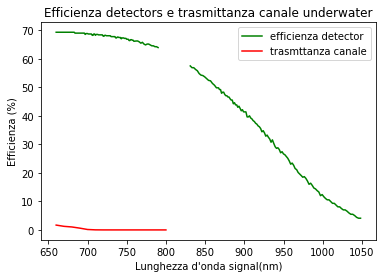

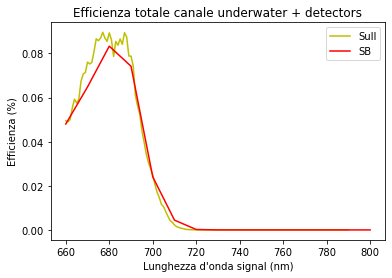

In [370]:
x1 = wavelengthsSullnew
x2 = wavelengthsidlerSull
x3 = wavelengthsSBnew
x4 = wavelengthsidlerSull

transmittSullpercent = 100 * transmittSull
y1 = transmittSullpercent

effDetectorsignalSullpercent = 100 * effDetectorsignalSull
y2 = effDetectorsignalSullpercent 

effDetectoridlerSullpercent = 100 * effDetectoridlerSull
y3 = effDetectoridlerSullpercent

efftotSullpercent = 100 * efftotSull
y4 = efftotSullpercent

transmittSBpercent = 100 * transmittSB
y5 = transmittSBpercent

efftotSBpercent = 100 * efftotSB
y6 = efftotSBpercent



#plot efficienze attese in funzione della lunghezza d'onda
#plt.plot(x1, y1, color='r', label='Sull') # r - red colour
plt.plot(x1, y2, color='g', label='efficienza detector') # g - green colour
plt.plot(x2, y3, color='g') # y - green colour
plt.plot(x3, y5, color='r', label ='trasmttanza canale') # y - yellow colour
plt.xlabel("Lunghezza d'onda signal(nm)")
plt.ylabel("Efficienza (%)")
plt.title("Efficienza detectors e trasmittanza canale underwater")
plt.legend()
#plt.axis([500, 800, 0, 1]) # [xstart, xend, ystart, yend]
plt.show()



#plot efficienze attese in funzione della lunghezza d'onda
plt.plot(x1, y4, color='y', label='Sull') # r - red colour
plt.plot(x3, y6, color='r', label='SB') # r - red colour
plt.xlabel("Lunghezza d'onda signal (nm)")
plt.ylabel("Efficienza (%)")
plt.title("Efficienza totale canale underwater + detectors")
plt.legend()
#plt.axis([500, 800, 0, 0.0001]) # [xstart, xend, ystart, yend]
plt.show()

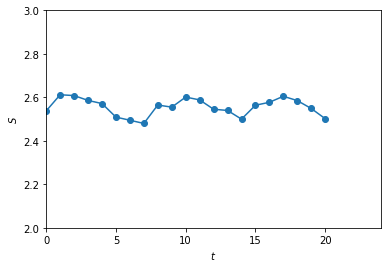

In [8]:
"""
plot coincidenze attese in funzione della distanza percorsa in acqua, per lunghezza d'onda fissata richiesta all'utente

lambdA = input("Inserire la lunghezza d'onda di interesse (in nm):\n")   
lambdA = int(lambdA)

if lambdA in wavelengthsSB:                             
    index =  np.where(wavelengthsSB == lambdA)  #crea un array con i valori di wavelengthsSB uguali a lambdA (qui solo uno)
    alpha = coeffSB[index[0]] # prende l'elemento di coeffSB nella posizione corrispondente
    print (alpha)
else:
    print ("Dati non disponibili per questa lunghezza d'onda.")

x = np.linspace(0, z, 100)
y = coincFree*np.exp(-alpha*x)


plt.plot(x, y)
plt.xlabel('$ z (m) $')
plt.ylabel('$coincidenze (Hz)$')
plt.title("Coincidenze attese canale underwater")
plt.axis([0, 10, 0, 40000]) # [xstart, xend, ystart, yend]
plt.show()

#stesso plot asse ordinate ridotto """

t = np.arange (0, 21)
S =  np.array([2.5376160839070105, 2.611838010022507, 2.6080921291340853, 2.58579076553876, 2.571336509096798, 2.509039077319604,  \
    2.4946415194281704, 2.4798918046501406, 2.5647575304789374, 2.554828223588592, 2.6011574124541705, 2.5881296787745196, 2.545285124402364,  \
    2.539626488941118, 2.499765617573856, 2.563668465388371, 2.577194049366428, 2.6049068576975394, 2.5849883125484574, 2.5486602699415166, 2.501742660691125])

plt.plot(t, S, marker="o")
plt.xlabel('$t$')
plt.ylabel('$S$')

plt.axis([0, 24 , 2, 3]) # [xstart, xend, ystart, yend]

plt.show()

 I due grafici sono uguali, nel secondo ho solo zoomato per mettere in luce il numero di coincidenze anche intorno a  $10m$.
Insomma dopo $10m$ le perdite non permettono di osservare coincidenze.